In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv("CleanStar.csv")
df.head()

,Vmag,Plx,B-V,MagA,Clase
0,7.27,2.52,0.024,14.277002,0.0
1,9.09,13.17,0.653,19.687930,0.0
2,7.03,3.79,-0.018,14.923197,0.0
3,8.02,3.79,1.220,15.913197,1.0
4,8.00,-0.03,1.894,5.385606,1.0


In [3]:
X_big = np.array(df[['Vmag','Plx','B-V','MagA']].values)
X_small = np.array(df[['B-V','MagA']].values)
Y = np.array(df['Clase'].values)

In [4]:
def best_lr(X_train, Y_train, X_test, Y_test):
    solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    best_solver = ''
    best_score_LR = 0
    for i in solvers:
        LogReg = LogisticRegression(solver=i)
        LogReg.fit(X_train, Y_train)
        score = LogReg.score(X_test,Y_test)
        if score > best_score_LR:
            best_score_LR = score
            best_solver = i
    print('El mejor solver para la regresion logistica es {}, con un accuracy en los datos de prueba de {}%.'.format(best_solver, best_score_LR*100))
    return best_solver

In [5]:
def best_knn(X_train, Y_train, X_test, Y_test):
    n_neigh = 15
    K_best = 0
    Score_best = 0

    for i in range(1,n_neigh):
        KNN = KNeighborsClassifier(n_neighbors=i)
        KNN.fit(X_train,Y_train)
        Y_pred = KNN.predict(X_test)
        if KNN.score(X_test,Y_test) > Score_best:
            Score_best = KNN.score(X_test,Y_test)
            K_best = i
    print('El mejor numero de vecinos para K-NN es {}, con un accuracy en los datos de prueba de {}%.'.format(K_best, (Score_best*100)))
    return K_best

In [6]:
def models(X,Y,best_solver,K_best):
    # prepare configuration for cross validation test harness
    seed = 7
    # prepare models
    models = []
    models.append(('LR', LogisticRegression(solver=best_solver)))
    models.append(('TREE', DecisionTreeClassifier()))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=K_best)))
    models.append(('GNB', GaussianNB()))
    models.append(('SVM', SVC())) #takes longer, comment if needed 2mins aprox
    models.append(('NN', MLPClassifier(hidden_layer_sizes=(64,32), max_iter=300)))
    models.append(('LDA', LinearDiscriminantAnalysis()))
    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

Usando todas las variabes

El mejor solver para la regresion logistica es newton-cg, con un accuracy en los datos de prueba de 88.11485964460468%.
El mejor numero de vecinos para K-NN es 12, con un accuracy en los datos de prueba de 88.41102240535669%.
LR: 0.880453 (0.004622)
TREE: 0.819572 (0.006654)
KNN: 0.881355 (0.006579)
GNB: 0.847592 (0.003377)
SVM: 0.883389 (0.004842)
NN: 0.884445 (0.005113)
LDA: 0.881715 (0.004687)


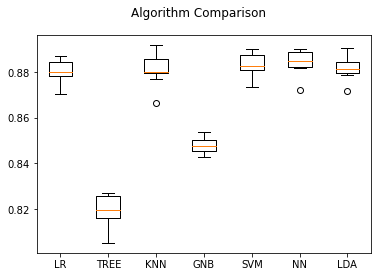

In [7]:
# Dividimos datos
X_trainB, X_testB, Y_trainB, Y_testB = train_test_split(X_big, Y, test_size=0.2, random_state=42)
# Normalizamos
scalerB = StandardScaler().fit(X_trainB)
X_trainB = scalerB.transform(X_trainB)
X_testB = scalerB.transform(X_testB)
X_big = scalerB.transform(X_big)
# modelos
best_solver = best_lr(X_trainB, Y_trainB, X_testB, Y_testB)
K_best = best_knn(X_trainB, Y_trainB, X_testB, Y_testB)
models(X_big,Y,best_solver,K_best)

Usando las ultimas dos variables (B-V, MagA)

El mejor solver para la regresion logistica es newton-cg, con un accuracy en los datos de prueba de 88.34663919649756%.
El mejor numero de vecinos para K-NN es 12, con un accuracy en los datos de prueba de 88.06335307751738%.
LR: 0.881226 (0.004739)
TREE: 0.817409 (0.007295)
KNN: 0.879217 (0.004526)
GNB: 0.881973 (0.004509)
SVM: 0.881741 (0.004472)
NN: 0.882823 (0.004867)
LDA: 0.881638 (0.003987)


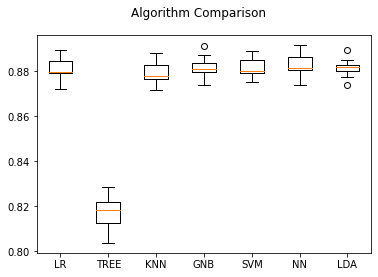

In [8]:
# Dividimos datos
X_trainS, X_testS, Y_trainS, Y_testS = train_test_split(X_small, Y, test_size=0.2, random_state=42)
# Normalizamos
scalerS = StandardScaler().fit(X_trainS)
X_trainS = scalerS.transform(X_trainS)
X_testS = scalerS.transform(X_testS)
X_small = scalerS.transform(X_small)
# Modelos
best_solver = best_lr(X_trainS, Y_trainS, X_testS, Y_testS)
K_best = best_knn(X_trainS, Y_trainS, X_testS, Y_testS)
models(X_small,Y,best_solver,K_best)

Podemos ver que el desempeño para ambas prubeas nos da resultados muy similares con la excepcion del Gaussian Naive Bayes el cual se desempeña mucho mejor con solo los dos ultimos features, a partir de ahora seguiremos usando solo estos dos ultimos features.